In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 4.35 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 4.4 MB/s 
     |████████████████████████████████| 465 kB 52.2 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-12-03 07:41:29--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bi

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7f34d1e079a0>)

In [ ]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [ ]:
total_data[:5]


,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [ ]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [ ]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()


(4, 199908, 2)

In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


In [ ]:
print(total_data.isnull().values.any())


False


In [ ]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 149931
테스트용 리뷰의 개수 : 49977


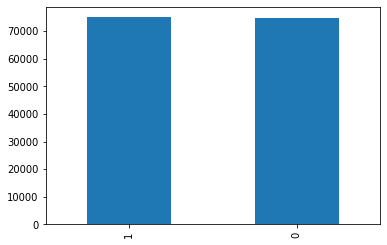

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')


In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))


   label  count
0      0  74918
1      1  75013


In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())


<ipython-input-17-5c91c21161d5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


ratings    0
reviews    0
label      0
dtype: int64


In [ ]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 49977


<ipython-input-18-5968a3f5f2bc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [ ]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']


In [ ]:
train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)


In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('네요', 31799), ('는데', 20295), ('안', 19718), ('어요', 14849), ('있', 13200), ('너무', 13058), ('했', 11783), ('좋', 9812), ('배송', 9677), ('같', 8997), ('구매', 8876), ('어', 8869), ('거', 8854), ('없', 8670), ('아요', 8642), ('습니다', 8436), ('그냥', 8355), ('되', 8345), ('잘', 8029), ('않', 7984)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('좋', 39488), ('아요', 21184), ('네요', 19895), ('어요', 18686), ('잘', 18602), ('구매', 16171), ('습니다', 13320), ('있', 12391), ('배송', 12275), ('는데', 11670), ('했', 9818), ('합니다', 9801), ('먹', 9635), ('재', 9273), ('너무', 8397), ('같', 7868), ('만족', 7261), ('거', 6482), ('어', 6294), ('쓰', 6292)]


In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 39998
등장 빈도가 1번 이하인 희귀 단어의 수: 18213
단어 집합에서 희귀 단어의 비율: 45.53477673883694
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7935698749320282


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)


단어 집합의 크기 : 21787


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[67, 2060, 299, 14259, 263, 73, 6, 236, 168, 137, 805, 2951, 625, 2, 77, 62, 207, 40, 1343, 155, 3, 6], [482, 409, 52, 8530, 2561, 2517, 339, 2918, 250, 2357, 38, 473, 2], [46, 24, 825, 105, 35, 2372, 160, 7, 10, 8061, 4, 1319, 29, 140, 322, 41, 59, 160, 140, 7, 1916, 2, 113, 162, 1379, 323, 119, 136]]


In [ ]:
print(X_test[:3])


[[14, 704, 767, 116, 186, 252, 12], [339, 3904, 62, 3816, 1651], [11, 69, 2, 49, 164, 3, 27, 15, 6, 513, 289, 17, 92, 110, 564, 59, 7, 2]]


리뷰의 최대 길이 : 85
리뷰의 평균 길이 : 15.307521459871541


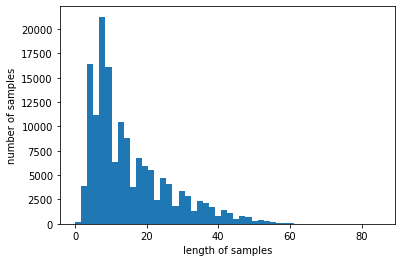

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.99933302652553


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2714 - acc: 0.8975
Epoch 1: val_acc improved from -inf to 0.91876, saving model to best_model.h5
1875/1875 [==============================] - 381s 201ms/step - loss: 0.2714 - acc: 0.8975 - val_loss: 0.2257 - val_acc: 0.9188
Epoch 2/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2152 - acc: 0.9217
Epoch 2: val_acc improved from 0.91876 to 0.92400, saving model to best_model.h5
1875/1875 [==============================] - 370s 197ms/step - loss: 0.2152 - acc: 0.9217 - val_loss: 0.2083 - val_acc: 0.9240
Epoch 3/15
1875/1875 [==============================] - ETA: 0s - loss: 0.1985 - acc: 0.9288
Epoch 3: val_acc improved from 0.92400 to 0.92577, saving model to best_model.h5
1875/1875 [==============================] - 353s 188ms/step - loss: 0.1985 - acc: 0.9288 - val_loss: 0.2110 - val_acc: 0.9258
Epoch 4/15
1875/1875 [==============================] - ETA: 0s - loss: 0.1876 - acc: 0.9336
Epoch 4

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1562/1562 [==============================] - 34s 22ms/step - loss: 0.2079 - acc: 0.9254

 테스트 정확도: 0.9254


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)
  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    positive_negative = 1
    prob = score
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(prob * 100))
  else:
    positive_negative = -1
    prob = 1-score
    print("{:.2f}% 확률로 부정 리뷰입니다.".format(prob * 100))
  
  return positive_negative, prob

In [ ]:
sentiment_predict('최고예요 진짜 좋은데요~? 지인분 컴퓨터 대신구매해줬는데 진짜 좋습니다. 1. os미설치 모델인데도 불구하고 설명서에 os설치방법, 드라이버 잡는 법(프로그램 탑재되어 있음)까지 나와있네요~ 레노버는 인터넷에서 검색하고 설치시 불편한데 이 제품은 편하게 설치 완료.2. 포트구성이 너무 좋아요~ sd카드에, c포트, a포트2개, hdmi포트, 랜포트까지 진짜 lg노트북은 이런게 좋네요. 맥북은 사면 기본 허브 한두개는 사야하는데.. 주변기기 구입하지 않아도 되어서 좋습니다. ^^3. 라이젠3라 큰 기대안했는데, 빠르고 좋네요~ 버벅임도 없고. 엑셀 파포 한글 프로그램 바로 바로 열리고 인터넷 검색속도도 훌륭하고..4. 펜소음이 없네요~ 맥북에어 반값도 안되는데, 맥북이랑 별차이를 못 느끼겠어요~ 펜소음때문에 맥북m1모델 샀었는데 이 제품도 펜소음이 없네요. 물론 고사양이 필요한 작업을 하면 소음이 나겠지만 일반적인 간단한 작업환경에서는 쾌적하게 사용할 수 있습니다. 5. 저가 노트북 특히 ~ 저가지만 ~ 구체적인 니트 수치나, ntsc 수치는 나와있지 않지만(당연히 수치가 안 좋겠죠~ 어쩔 수 없는 부분이라 생각함.) 사용시 불편함이 없는거보면 . 6. 디자인: 그램이랑 무게차이만 있지 진짜 예쁩니다~. . 가볍게 생겨서~^^; 개봉후 너무 예뻐서 ""와 진짜 이쁘네"" 했네요~ 이런분들께 추천: 게임이나 영상 작업 안하고 인터넷이라든지, 문서작업등만 하는 . 사무용노트북이라고 보시면 됩니다. 저가형 모델 구입시 성능은 다 비슷비슷합니다. 예쁜 디자인, AS, 빠른 인터넷, 프로그램 로딩속도 면에서 15UD40Q-GX30K 모델 정도면 훌륭하다고 생각하구요. 40만원대 노트북 찾으시는 분들은 선택지에 올려 놓고 고민해보시기 바랍니다. 아! 화면 끌때 1초도 안걸리는것 같아요~. ^^. 지인분 OS 설치하고 갖다줘야 하는데, 제가 갖고 싶네요~. ㅠㅠ"')


1/1 [==============================] - 0s 489ms/step
78.78% 확률로 긍정 리뷰입니다.


(1, 0.7877699136734009)

In [ ]:
sentiment_predict('"드라이버가 노트북 내부 M.2에 파티션으로 들어있는건 ...드라이버가 노트북 내부 M.2에 파티션으로 들어있는건 매우 참신함. 사기전에 상품정보에 그런 내용이 있었으면 더 좋았을뻔 ... 근데 사고나서 3일만에 가격이 더 떨어진건 안타까운일...ㅠ제품은 나무랄것이 없음. 근데 영상미팅을 해야해서 마이크를 찾아보는데... 분명 입력은 되는데 어디가 마이크인지 찾을수가 없음. 설명서도 봤는데 명기된 사항 없음. 세부정보에 조금 아쉬움."')

1/1 [==============================] - 0s 26ms/step
97.50% 확률로 부정 리뷰입니다.


(-1, 0.9750315584242344)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/BKMS_project

/content/drive/MyDrive/BKMS_project


In [ ]:
data = pd.read_csv('coupang_crawl.csv', index_col=0)

In [ ]:
data.head()

,상품명,구매자 이름,구매자 평점,리뷰 제목,리뷰 내용
0,"Apple 2022 맥북 에어, 실버, M2 8코어, GPU 8코어, 256GB, ...",이*현,5.0,아이패드 짝꿍,당근에서 미개봉 구하다가 실버 색상은 없어서 쿠팡에서 구매했습니다와우 회원 쿠폰 쓰...
1,"Apple 2022 맥북 에어, 미드나이트, M2 8코어, GPU 8코어, 256G...",한*기,4.0,맥북병은 맥북을 사야 낫죠. 완치했습니다.,- 구매 계기20대부터 맥북을 써봐야지 했는데 매 번 윈도우 노트북을 사용하다 보니...
2,"Apple 2022 맥북 에어, 미드나이트, M2 8코어, GPU 8코어, 256G...",강*중,5.0,와씨... 완전 개 이쁨...,"8월 5일 배송예정이었는데, 8월1일 배송받았어요! 압도적감사!!!미드나이트 컬러로..."
3,"Apple 2022 맥북 에어, 미드나이트, M2 8코어, GPU 8코어, 256G...",김*현,5.0,등록된 헤드라인이 없습니다,M1 제품이 너무 저렴하게 잘 나왔다보니 상대적으로 평가가 애매한 M2 제품입니다....
4,"Apple 2022 맥북 에어, 스페이스그레이, M2 8코어, GPU 8코어, 25...",김*린,5.0,고민말고 GO!! 완전만족~~ 역시 애플,얼마전 애플 스토어에 방문했다가 넘 이뻐서 고민고민 끝에 구입했어요ㅎㅎ 윈도우만 써...


In [ ]:
len(data)

2775

In [ ]:
sentiment = []
p_pos_neg = []
for i in range(len(data)):
  result = sentiment_predict(data['리뷰 내용'][i])
  sentiment.append(result[0])
  p_pos_neg.append(result[1])
data['긍정부정'] = sentiment
data['긍정부정 확률'] = p_pos_neg

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
57.67% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 25ms/step
99.05% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 26ms/step
98.52% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 28ms/step
99.40% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 23ms/step
84.43% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 25ms/step
74.27% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 29ms/step
53.04% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 23ms/step
98.46% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 26ms/step
99.70% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 23ms/step
98.12% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 25ms/step
98.83% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 23ms/step
99.22% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 25ms/step
97.23% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 26ms/step
97.93% 확률로 긍정 리

In [ ]:
data.head()

,상품명,구매자 이름,구매자 평점,리뷰 제목,리뷰 내용,긍정부정,긍정부정 확률
0,"Apple 2022 맥북 에어, 실버, M2 8코어, GPU 8코어, 256GB, ...",이*현,5.0,아이패드 짝꿍,당근에서 미개봉 구하다가 실버 색상은 없어서 쿠팡에서 구매했습니다와우 회원 쿠폰 쓰...,1,0.894794
1,"Apple 2022 맥북 에어, 미드나이트, M2 8코어, GPU 8코어, 256G...",한*기,4.0,맥북병은 맥북을 사야 낫죠. 완치했습니다.,- 구매 계기20대부터 맥북을 써봐야지 했는데 매 번 윈도우 노트북을 사용하다 보니...,1,0.944754
2,"Apple 2022 맥북 에어, 미드나이트, M2 8코어, GPU 8코어, 256G...",강*중,5.0,와씨... 완전 개 이쁨...,"8월 5일 배송예정이었는데, 8월1일 배송받았어요! 압도적감사!!!미드나이트 컬러로...",1,0.957828
3,"Apple 2022 맥북 에어, 미드나이트, M2 8코어, GPU 8코어, 256G...",김*현,5.0,등록된 헤드라인이 없습니다,M1 제품이 너무 저렴하게 잘 나왔다보니 상대적으로 평가가 애매한 M2 제품입니다....,1,0.815718
4,"Apple 2022 맥북 에어, 스페이스그레이, M2 8코어, GPU 8코어, 25...",김*린,5.0,고민말고 GO!! 완전만족~~ 역시 애플,얼마전 애플 스토어에 방문했다가 넘 이뻐서 고민고민 끝에 구입했어요ㅎㅎ 윈도우만 써...,1,0.984701


In [ ]:
data

,상품명,구매자 이름,구매자 평점,리뷰 제목,리뷰 내용,긍정부정,긍정부정 확률
0,"Apple 2022 맥북 에어, 실버, M2 8코어, GPU 8코어, 256GB, ...",이*현,5.0,아이패드 짝꿍,당근에서 미개봉 구하다가 실버 색상은 없어서 쿠팡에서 구매했습니다와우 회원 쿠폰 쓰...,1,0.894794
1,"Apple 2022 맥북 에어, 미드나이트, M2 8코어, GPU 8코어, 256G...",한*기,4.0,맥북병은 맥북을 사야 낫죠. 완치했습니다.,- 구매 계기20대부터 맥북을 써봐야지 했는데 매 번 윈도우 노트북을 사용하다 보니...,1,0.944754
2,"Apple 2022 맥북 에어, 미드나이트, M2 8코어, GPU 8코어, 256G...",강*중,5.0,와씨... 완전 개 이쁨...,"8월 5일 배송예정이었는데, 8월1일 배송받았어요! 압도적감사!!!미드나이트 컬러로...",1,0.957828
3,"Apple 2022 맥북 에어, 미드나이트, M2 8코어, GPU 8코어, 256G...",김*현,5.0,등록된 헤드라인이 없습니다,M1 제품이 너무 저렴하게 잘 나왔다보니 상대적으로 평가가 애매한 M2 제품입니다....,1,0.815718
4,"Apple 2022 맥북 에어, 스페이스그레이, M2 8코어, GPU 8코어, 25...",김*린,5.0,고민말고 GO!! 완전만족~~ 역시 애플,얼마전 애플 스토어에 방문했다가 넘 이뻐서 고민고민 끝에 구입했어요ㅎㅎ 윈도우만 써...,1,0.984701
...,...,...,...,...,...,...,...
2770,"삼성전자 갤럭시 버즈2 프로, SM-R510N, 그라파이트",엄*현,5.0,등록된 헤드라인이 없습니다,배송도 빠르고 포장도 잘되었습니다,1,0.953928
2771,"삼성전자 갤럭시 버즈2 프로, SM-R510N, 화이트",권*훈,1.0,"포장 개성의없음, 새제품 뜯었는데 유닛 방전",제조년월 202207제품. 박스 안 완충재는 터진거 그냥 넣어서 보낸듯. 완충재 넣...,-1,0.993007
2772,"삼성전자 갤럭시 버즈2 프로, SM-R510N, 화이트",김*인,1.0,빈박스...,나에게도 이런일이 일어날줄이야... 말로만 듣던 빈박스가 배송됬네요.,-1,0.963738
2773,"삼성전자 갤럭시 버즈2 프로, SM-R510N, 그라파이트",한*섭,5.0,등록된 헤드라인이 없습니다,매우 만족합니다...적극 추천합니다....,1,0.982184


In [ ]:
data.to_csv('pos_neg.csv')